In [ ]:
import shap
import xgboost
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
#load data
# Breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# train the model
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.956140350877193


In [ ]:
#SHAP explanations
# Initialize SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)


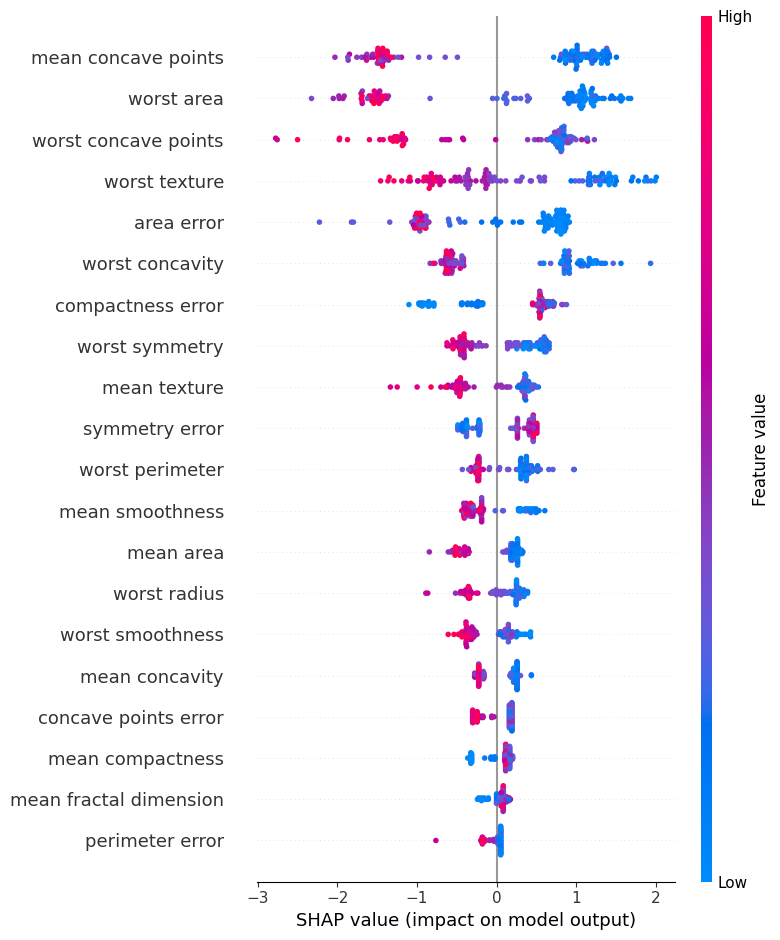

In [ ]:
#visualizations
# summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [ ]:
# Force Plot (Single Prediction)

# One prediction
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values.values[0],
    features=X_test[0],
    feature_names=feature_names
)


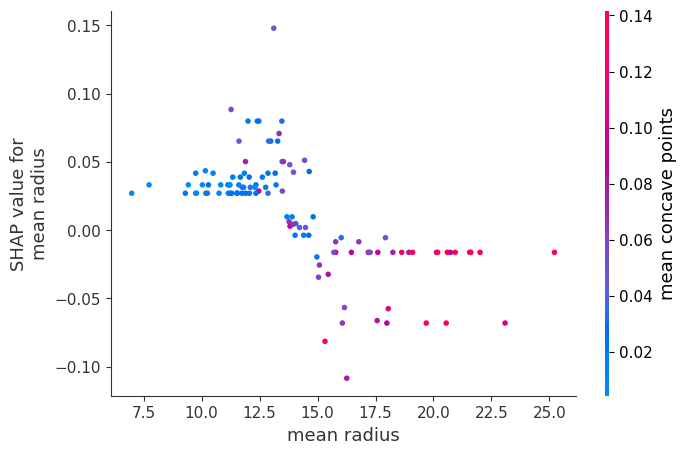

In [ ]:
# Dependence Plot (for a specific feature)


shap.dependence_plot(0, shap_values.values, X_test, feature_names=feature_names)

In [ ]:
# titanic data set
import seaborn as sns
import pandas as pd

# Load dataset
df = sns.load_dataset("titanic")

# Quick look
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# preprocess the data
# Drop rows with missing values
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked', 'sibsp', 'parch']].dropna()

# Encode categorical columns
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']


In [ ]:
# train
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7552447552447552


In [ ]:
# SHAP explanation
import shap

# Create SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)


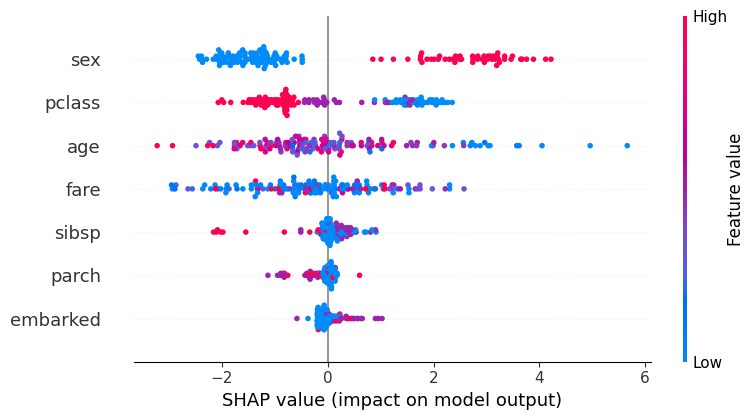

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


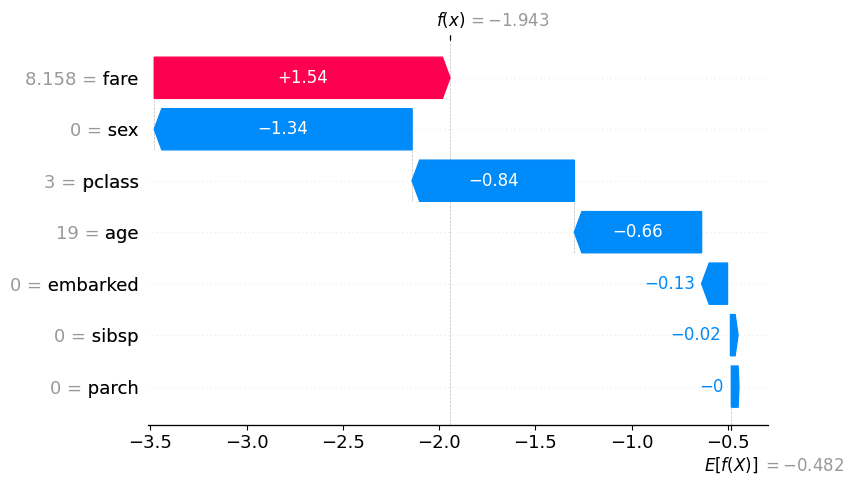

In [ ]:
shap.plots.waterfall(shap_values[10])


In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values.values[0],
    features=X_test.iloc[0],
    feature_names=X.columns
)


🔍 Interpretation Example
In the summary plot, you may find:

sex is the most influential feature (female passengers had higher survival rates).

fare and age also impact survival.

In the waterfall plot, you see:

How individual features for one person influenced their predicted survival probability.